In [12]:
import numpy as np
from numpy import radians

# Creates vehicle and set values
from pyaat.aircraft import Aircraft
minhaAeronave = Aircraft(mass=45e3, Ixx=0.554e6, Iyy=2.53e6,
                         Izz =3.01e6, Izx=0.106e6, Cbarw =3.666,
                         bw=28.42, Sw=95.0)


# Aerodynamic coeficients
minhaAeronave.coef0 = [0.0252, 0.0, 0.382, 0.0, 0.0622, 0.0]
minhaAeronave.coefALPHA = [0.2010, 0.0, 6.29, 0.0, -3.63, 0.0]
minhaAeronave.coefBETA = [0.0, 0.785, 0.0, -0.121, 0.0, 0.174]
minhaAeronave.coefP = [0.0, -0.0794, 0.0, -0.522, 0.0, -0.0587]
minhaAeronave.coefQ = [0.281, 0.0, 14.6, 0.0, -45.5, 0.0]
minhaAeronave.coefR = [0.0, 0.572, 0.0, 0.254, 0.0, -0.277]

minhaAeronave.CLmax = 2.4
minhaAeronave.qmax = 23052.05 # considering 700km/h at sea level
minhaAeronave.Vinf = 200

# Environment

minhaAeronave.set_control_surface('Profundor', [0.0126, 0.0, 0.3891, 0.0, -1.5980, 0.0],(radians(-30), radians(30)))
minhaAeronave.set_control_surface('Aileron', [0.0, 0.0094, 0.0, -0.1784, 0.0, 0.0080],(radians(-20), radians(30)))
minhaAeronave.set_control_surface('Leme', [0.0, -0.3030, 0.0, -0.0464, 0.0, -0.1594],(radians(-40), radians(40)))

minhaAeronave.qmax = 23052.05 # considering 700km/h at sea level

from pyaat.atmosphere import atmosCOESA
minhaAtmosfera = atmosCOESA()

from pyaat.gravity import Earth_NewtonGravity
minhaGravidade = Earth_NewtonGravity()

from pyaat.propulsion import JetModel
MotorEsquerdo = JetModel('Motor esquerdo', Fmaxi = 35e3, nrho = 0.775, rhoi = 0.41271,
                         Vi = 200.0, nv = 0)
MotorEsquerdo.set_position(np.array([0, -5, 1.42]))
MotorEsquerdo.set_attitude(np.array([0., radians(0.), 0.]))

MotorDireito = JetModel('Motor direito', Fmaxi = 35e3, nrho = 0.775, rhoi = 0.41271,
                         Vi = 200.0, nv = 0)
MotorDireito.set_position(np.array([0, 5.0, 1.42]))
MotorDireito.set_attitude(np.array([0., radians(0.), 0.]))

minhaPropulsao = [MotorEsquerdo, MotorDireito]

minhaPropulsao = [MotorEsquerdo, MotorDireito]

from pyaat.system import system
meuSistema = system(atmosphere = minhaAtmosfera, propulsion = minhaPropulsao, aircraft = minhaAeronave, gravity = minhaGravidade)

In [13]:
from pyaat.system import system
System = system(atmosphere = minhaAtmosfera, propulsion = minhaPropulsao, aircraft = minhaAeronave, gravity = minhaGravidade)

/home/ydor9e/.local/lib/python3.10/site-packages/PyAAT-0.0.dev10-py3.10.egg/pyaat/performance.py:88: RuntimeWarning: divide by zero encountered in true_divide
  (2*self.k*(self.mass*self.g)**2)/(rho*V*self.S) - Pmax)


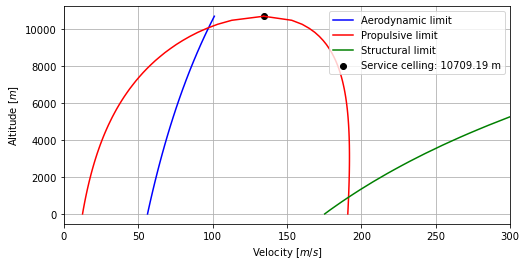

In [14]:
import matplotlib.pyplot as plt

from pyaat.performance import Envelope
Envelope(System, limits = [0,300])

#plt.savefig('Envelope.pdf', dpi = 400,bbox_inches='tight')